In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [16]:
bow=pd.read_csv(r'C:\Users\CYBER WORLD\OneDrive\Desktop\Project\bowling.csv')

In [17]:
bow.head()

,PlayerName,Team1,Team2,Overs,Maidens,Runs,Wickets,Economy,Dream11_score
0,Umesh Yadav,KKR,CSK,4.0,0,20,2,5.00,58
1,Shivam Mavi,KKR,CSK,4.0,0,35,0,8.75,4
2,Varun Chakaravarthy,KKR,CSK,4.0,0,23,1,5.75,33
3,Sunil Narine,KKR,CSK,4.0,0,15,0,3.75,10
4,Andre Russell,KKR,CSK,4.0,0,38,1,9.50,29


In [18]:
bow.tail()

,PlayerName,Team1,Team2,Overs,Maidens,Runs,Wickets,Economy,Dream11_score
851,Trent Boult,RR,GT,4.0,1,14,1,3.50,47
852,Prasidh Krishna,RR,GT,4.0,0,40,1,10.00,27
853,Yuzvendra Chahal,RR,GT,4.0,0,20,1,5.00,33
854,Obed McCoy,RR,GT,3.1,0,26,0,8.21,4
855,Ravichandran Ashwin,RR,GT,3.0,0,32,0,10.67,2


In [19]:
bow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PlayerName     856 non-null    object 
 1   Team1          856 non-null    object 
 2   Team2          856 non-null    object 
 3   Overs          856 non-null    float64
 4   Maidens        856 non-null    int64  
 5   Runs           856 non-null    int64  
 6   Wickets        856 non-null    int64  
 7   Economy        856 non-null    float64
 8   Dream11_score  856 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 60.3+ KB


In [20]:
bow.columns

Index(['PlayerName', 'Team1', 'Team2', 'Overs', 'Maidens', 'Runs', 'Wickets',
       'Economy', 'Dream11_score'],
      dtype='object')

In [21]:
bow.dtypes

PlayerName        object
Team1             object
Team2             object
Overs            float64
Maidens            int64
Runs               int64
Wickets            int64
Economy          float64
Dream11_score      int64
dtype: object

In [22]:
bow.shape

(856, 9)

In [10]:
bow.isnull().sum()

PlayerName    0
Team1         0
Team2         0
Overs         0
Maidens       0
Runs          0
Wickets       0
Economy       0
dtype: int64

In [23]:
bow.describe()

,Overs,Maidens,Runs,Wickets,Economy,Dream11_score
count,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000
mean,3.326168,0.032710,28.019860,0.990654,8.729439,29.799065
std,0.996716,0.184436,11.227924,1.074927,3.336894,29.639421
min,0.100000,0.000000,1.000000,0.000000,1.670000,-2.000000
25%,3.000000,0.000000,20.000000,0.000000,6.500000,4.000000
50%,4.000000,0.000000,28.000000,1.000000,8.330000,29.000000
75%,4.000000,0.000000,36.000000,2.000000,10.500000,50.000000
max,4.000000,2.000000,64.000000,5.000000,36.000000,163.000000


<AxesSubplot:xlabel='PlayerName', ylabel='count'>

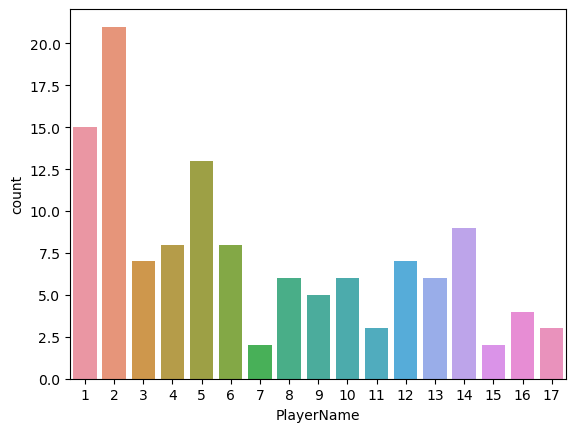

In [24]:
sns.countplot(x=bow.PlayerName.value_counts(),data=bow)

In [1]:
player_stats=bow[['PlayerName','Overs','Maidens','Runs','Wickets','Economy','Dream11_score']].groupby('PlayerName').sum().sort_values("Wickets",ascending=False)

NameError: name 'bow' is not defined

In [13]:
highest_wkts=bow['Wickets'].argmax()
bow.iloc[highest_wkts]

PlayerName    Yuzvendra Chahal
Team1                       RR
Team2                      KKR
Overs                      4.0
Maidens                      0
Runs                        40
Wickets                      5
Economy                   10.0
Name: 350, dtype: object

In [27]:
player_statshighest_score=bow['Dream11_score'].argmax()
bow.iloc[highest_score]

PlayerName       Wanindu Hasaranga
Team1                          RCB
Team2                          SRH
Overs                          4.0
Maidens                          1
Runs                            18
Wickets                          5
Economy                        4.5
Dream11_score                  163
Name: 627, dtype: object

In [28]:
player_stats

,Overs,Maidens,Runs,Wickets,Economy,Dream11_score
PlayerName,,,,,,
Yuzvendra Chahal,68.0,0,527,27,131.75,785
Wanindu Hasaranga,57.0,1,430,26,123.25,760
Kagiso Rabada,48.0,0,406,23,110.67,645
Umran Malik,49.1,1,444,22,129.92,634
Kuldeep Yadav,49.4,0,419,21,118.79,605
...,...,...,...,...,...,...
Rasikh Salam,4.0,0,28,0,16.00,10
Rahul Tewatia,6.0,0,76,0,65.00,18
Mahipal Lomror,2.0,0,18,0,18.00,8


In [29]:
player_team=bow[['PlayerName','Team1']].groupby('PlayerName').sample()
player_team.set_index("PlayerName",inplace=True)
player_team
player_team.loc['Yuzvendra Chahal']

Team1    RR
Name: Yuzvendra Chahal, dtype: object

In [30]:
player_stats=player_stats.merge(player_team,on='PlayerName')
player_stats

,Overs,Maidens,Runs,Wickets,Economy,Dream11_score,Team1
PlayerName,,,,,,,
Yuzvendra Chahal,68.0,0,527,27,131.75,785,RR
Wanindu Hasaranga,57.0,1,430,26,123.25,760,RCB
Kagiso Rabada,48.0,0,406,23,110.67,645,PBSK
Umran Malik,49.1,1,444,22,129.92,634,SRH
Kuldeep Yadav,49.4,0,419,21,118.79,605,DC
...,...,...,...,...,...,...,...
Rasikh Salam,4.0,0,28,0,16.00,10,KKR
Rahul Tewatia,6.0,0,76,0,65.00,18,GT
Mahipal Lomror,2.0,0,18,0,18.00,8,RCB
